# Overall scores comparison

<hr>

This notebook displays a brief comparison between all of the models tested, based on two scoring methods: ROC-AUC and accuracy, both performed in 10-fold cross-validation.

<hr>


In [1]:
# Import needed libraries and modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load data - GPU only
df_gpu = pd.concat([
    pd.read_csv('../2-GP-Implementation/scores-gpu.csv', index_col=0),
    pd.read_csv('../3-GP-Optimization/scores-gpu.csv', index_col=0),
    pd.read_csv('../4-Alternative-Models/scores-gpu.csv', index_col=0)
], axis=1)

# Transpose the entire dataframe to make columns into rows
df_gpu = df_gpu.T

# Split into model and optimization dataframes
model_df_gpu = df_gpu[df_gpu.index.str.contains('model')]
optim_df_gpu = df_gpu[df_gpu.index.str.contains('optimization')]

display(model_df_gpu, optim_df_gpu)

,Accuracy,Accuracy STD,AUC-ROC,AUC-ROC STD
scikit-model,0.851724,0.057077,0.908070,0.034690
gpytorch-model,0.842069,0.038783,0.911898,0.036908
pyro-model,0.730920,0.065671,0.738302,0.067041
k-NN-model,0.804828,0.071853,0.854997,0.062634
RNC-model,0.552184,0.013805,0.514286,0.017496
LR-model,0.844828,0.051216,0.914286,0.033670
DT-model,0.747011,0.056869,0.744540,0.059478
RF-model,0.801379,0.068440,0.881645,0.041419
SVM-SVC-model,0.831379,0.062404,0.899073,0.042552
SVM-NuSVC-model,0.828161,0.061061,0.900859,0.044040


,Accuracy,Accuracy STD,AUC-ROC,AUC-ROC STD
scikit-optimization,0.851724,0.057077,0.908070,0.034690
gpytorch-optimization,0.848966,0.044387,0.913561,0.034543
pyro-optimization,0.000000,0.000000,0.000000,0.000000
k-NN-optimization,0.828046,0.071470,0.900343,0.054682
RNC-optimization,0.807816,0.052786,0.898111,0.044033
LR-optimization,0.858391,0.054480,0.920295,0.031631
DT-optimization,0.797586,0.077024,0.857143,0.060523
RF-optimization,0.811149,0.051714,0.893853,0.030140
SVM-SVC-optimization,0.841609,0.062266,0.915762,0.033327
SVM-NuSVC-optimization,0.834713,0.039534,0.916071,0.036167


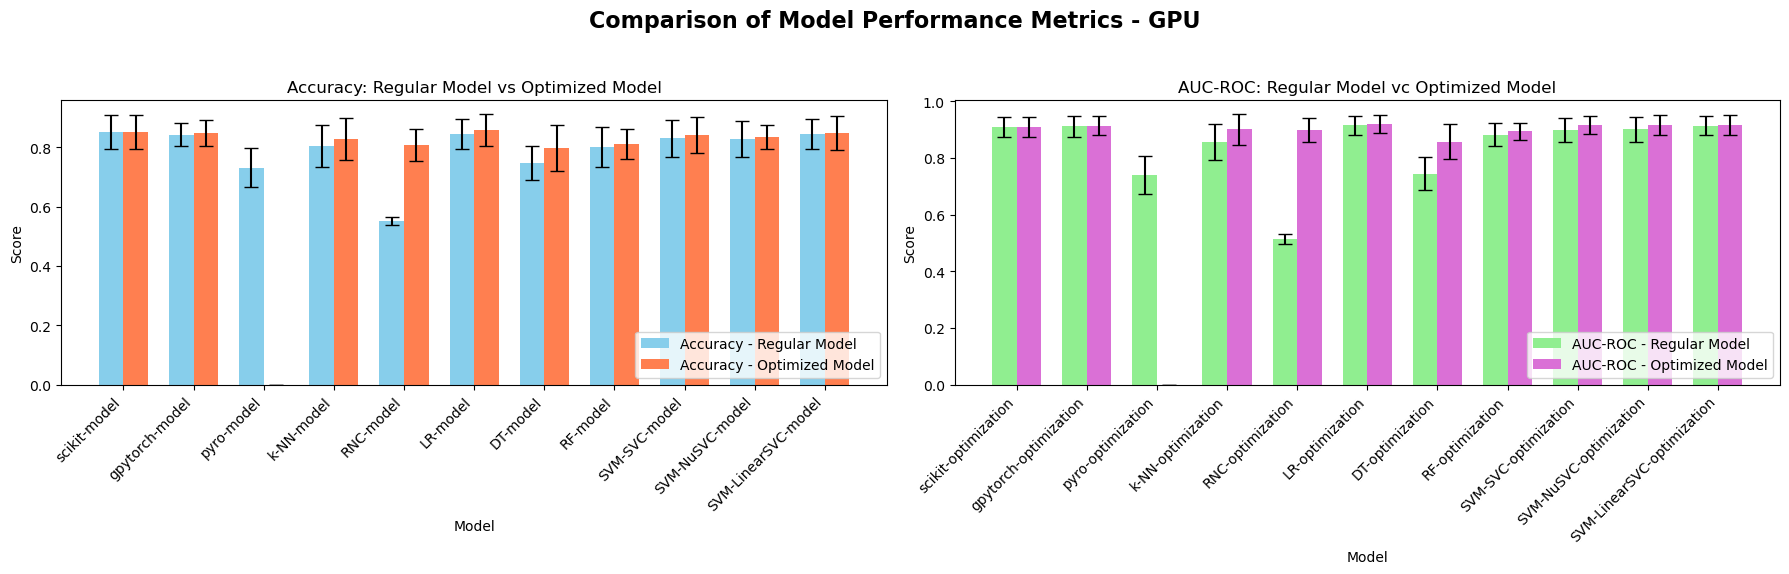

In [3]:

# Set up the figure with 2 subplots (one for models and one for optimizations)
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Plot for Models (Accuracy and AUC-ROC with error bars)
x = np.arange(len(model_df_gpu.index))
width = 0.35  # the width of the bars

# Accuracy and AUC-ROC bars for models
bars1 = axs[0].bar(x - width/2, model_df_gpu['Accuracy'], width, yerr=model_df_gpu['Accuracy STD'], label='Accuracy - Regular Model', color='skyblue', capsize=5)
bars2 = axs[0].bar(x + width/2, optim_df_gpu['Accuracy'], width, yerr=optim_df_gpu['Accuracy STD'], label='Accuracy - Optimized Model', color='coral', capsize=5)

# Customize the model plot
axs[0].set_title('Accuracy: Regular Model vs Optimized Model')
axs[0].set_xlabel('Model')
axs[0].set_ylabel('Score')
axs[0].set_xticks(x)
axs[0].set_xticklabels(model_df_gpu.index, rotation=45, ha='right')
axs[0].legend()

# Plot for Optimizations (Accuracy and AUC-ROC with error bars)
x = np.arange(len(optim_df_gpu.index))

# Accuracy and AUC-ROC bars for optimizations
bars1 = axs[1].bar(x - width/2, model_df_gpu['AUC-ROC'], width, yerr=model_df_gpu['AUC-ROC STD'], label='AUC-ROC - Regular Model', color='lightgreen', capsize=5)
bars2 = axs[1].bar(x + width/2, optim_df_gpu['AUC-ROC'], width, yerr=optim_df_gpu['AUC-ROC STD'], label='AUC-ROC - Optimized Model', color='orchid', capsize=5)

# Customize the optimization plot
axs[1].set_title('AUC-ROC: Regular Model vc Optimized Model')
axs[1].set_xlabel('Model')
axs[1].set_ylabel('Score')
axs[1].set_xticks(x)
axs[1].set_xticklabels(optim_df_gpu.index, rotation=45, ha='right')
axs[1].legend()

# Adjust layout for better spacing
fig.suptitle('Comparison of Model Performance Metrics - GPU', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
